## Description

Our idea was to create a **Skin Cancer Classification** model, which allows a user to input an image of a possible skin condition and determine whether there is a high likelihood of a certain type of skin cancer.

Our motivation behind the project was:
- 60% of people in the UK currently have a skin condition or have previously had a skin condition.
- There are at least 100,000 new cases of skin cancer reported every year in the UK.
- People may have a possible skin condition
- They may want to know whether they should act quickly to deal with it
- The results could be sent to healthcare professionals to allow them to evaluate a patient's problem more efficiently

This is a **command line**, and it is very simple to use as you only have to input the following:
* Name
* Age
* Gender
* Image of possible skin condition

The image must be clear (taken close enough to the skin), with the format being ".jpg".

## Importing Modules

In [1]:
from IPython.display import display
from PIL import Image
import os
import numpy as np
import tensorflow as tf
import pandas as pd

## User General Information Input

In [2]:
# Create error message for an incorrect imput
def gender():
    global choice
    choice = input("Gender ('Male', 'Female', or 'Other'): ").lower()

    if choice not in ['male', 'female', 'other']:
        return error_message()  # Call the error_message function
    else:
        return choice  # Return the valid gender choice

def error_message():
    return "Error: Invalid input. You must enter either 'Male', 'Female', or 'Other'."

In [3]:
name = input("Name: ")
age = input("Age: ")
gender_choice = gender()

# Check if the result is an error message or a valid input
if gender_choice == error_message():
    print(gender_choice)  # Print the error message
else: 
    print(f"Hello, {name}. You are {age} years old, and your gender is {gender_choice}. Please take a photo of your condition now.")

Name:  Anthony
Age:  19
Gender ('Male', 'Female', or 'Other'):  male


Hello, Anthony. You are 19 years old, and your gender is male. Please take a photo of your condition now.


## User Image Input

Please enter image filename (with extension, e.g. IBM_Z.jpg):  OIP.jpg


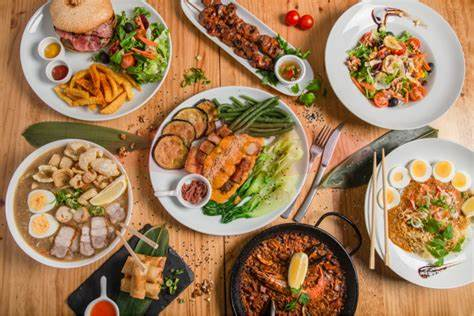

Image /home/jovyan/shared/OIP.jpg opened successfully.
Image size: (474, 316)
Image format: JPEG
Image mode: RGB


In [6]:
# Get the image filename from the user
image_file = input("Please enter image filename (with extension, e.g. IBM_Z.jpg): ")
current_path = os.getcwd()  # Get the current working directory

# Currently is working with OIP.jpg using the path /home/jovyan/shared/OIP.jpg (please use os to get this to work)

# Create the full path to the image
image_path = os.path.join(current_path, image_file)

# Check if the file exists
if os.path.isfile(image_path):
    try:
        # Open and read the image
        img = Image.open(image_path)

        # Display the image inline
        display(img)

        # Print details about the image
        print(f"Image {image_path} opened successfully.")
        print(f"Image size: {img.size}")      # e.g., (width, height)
        print(f"Image format: {img.format}")  # e.g., JPEG, PNG
        print(f"Image mode: {img.mode}")      # e.g., RGB, L

    except UnidentifiedImageError:
        print(f"Error: Cannot identify image file: {image_path}")
    except OSError as e:
        print(f"Error: An OS error occurred: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print("Error: The file does not exist. Please check the filename and try again.")

## Convert Image Pixels Into Tensor (RGB)

In [9]:
# Convert to numpy array for flexibility if necessary
image = img.convert('RGB')
rgb_array = np.array(image)

# Create image tensor, and print
tf_tensor = tf.convert_to_tensor(rgb_array, dtype=tf.float32)  # Adjust dtype as needed
# print(tf_tensor)

# Scale the tensor entries to be between 0 and 1, and print
tf_tensor_scaled = tf_tensor / 255.0
# print(tf_tensor_scaled)

## Model Building
Here, we build and train the model

In [ ]:
df = pd.read_pickle("./MvB/data/pickled_training_data")

first_column = tf.convert_to_tensor(df.loc[:, "image"])
second_column = tf.convert_to_tensor(df.loc[:, "verdict"])

images = tf.constant(first_column)
labels = tf.constant(second_column)


# Split your dataset into training and testing sets
train_size = int(0.8 * images.shape[0])
X_train, X_test = images[:train_size], images[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Define a simple Convolutional Neural Network (CNN) model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

## Outcome of Model

In [ ]:
out = model(tf_tensor_scaled)
out

## Returning User Results

In [ ]:
# Create results message depending on outcome

line1 = f"Dear {name},"
line2 = f"You told us that you are {age} and {gender_choice}."
line3 = f"Your information and image indicate that you should do the following:"
if out > 0.8:
    line4 = f"Please seek advice from healthcare professional as the condition is most likely to be melignant."
else:
    line4 = f"Please seek advice from healthcare professional, but there is a low chance that this is melignant skin cancer."

# Print results
results_message = line1 + 2*"\n" + line2 + "\n" + line3 + 2*"\n" + line4
print(results_message)